In [22]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [49]:
df = yf.download("AMZN", start = "2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [50]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
2022-01-04 00:00:00-05:00,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2022-01-05 00:00:00-05:00,166.882996,167.126495,164.356995,164.356995,164.356995,64302000
2022-01-06 00:00:00-05:00,163.450500,164.800003,161.936996,163.253998,163.253998,51958000
2022-01-07 00:00:00-05:00,163.839005,165.243500,162.031006,162.554001,162.554001,46606000


In [51]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02
mean,134.006772,136.284812,131.533322,133.861404,133.861404,7.332460e+07
std,19.677611,19.479003,19.515205,19.483823,19.483823,3.328078e+07
min,102.750000,104.580002,101.260002,102.309998,102.309998,2.583911e+07
25%,115.025000,117.499998,113.167501,115.204626,115.204626,5.341440e+07
50%,133.755005,135.895004,132.255005,133.445000,133.445000,6.416500e+07
75%,151.725880,154.084126,149.125999,151.316875,151.316875,8.255338e+07
max,170.438004,171.399994,167.868500,170.404495,170.404495,2.726620e+08


Text(0, 0.5, 'Close price')

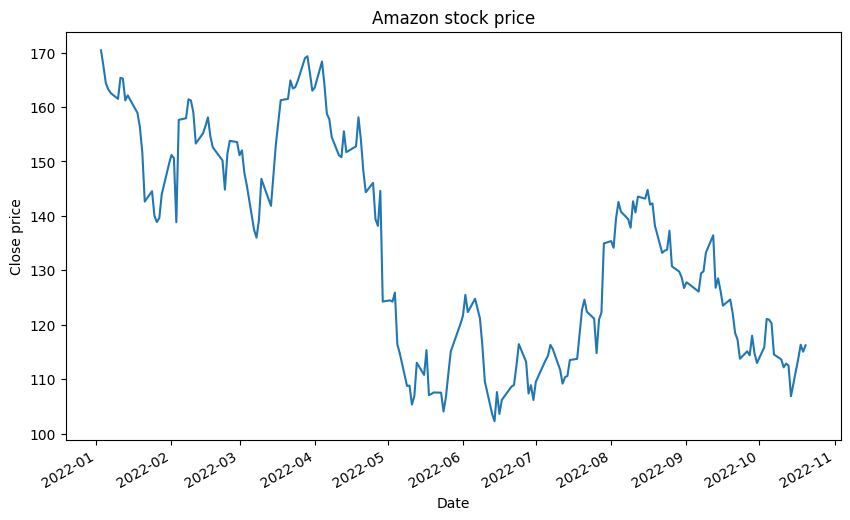

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
df["Close"].plot(figsize = (10, 6))
plt.title("Amazon stock price")
plt.ylabel("Close price")

In [53]:
# split into trainning and test data
target = df["Adj Close"]
features = ["Close", "Volume"]
X = df[features]
train_X, test_X, train_y, test_y = train_test_split(X, target, random_state = 1)

In [54]:
# process numerical data
numerical_transformer = SimpleImputer(strategy = "median")

# preprocessor
preprocessor = ColumnTransformer(
    transformers = [
        ("num", numerical_transformer, features)
    ]
)

# define model
model = XGBRegressor()

# bundle pipeline
my_pipeline = Pipeline(steps = [("preprocessor", preprocessor), 
                                ("model", model)
                                ])

In [55]:
# fit model
my_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Close', 'Volume'])])),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [56]:
# make predictions
y_preds = my_pipeline.predict(test_X)

In [65]:
print((y_preds - test_y)**2)

Date
2022-10-13 00:00:00-04:00    0.333144
2022-05-19 00:00:00-04:00    0.047502
2022-09-12 00:00:00-04:00    3.567312
2022-06-30 00:00:00-04:00    0.065698
2022-02-28 00:00:00-05:00    0.307018
2022-05-18 00:00:00-04:00    0.075282
2022-04-26 00:00:00-04:00    0.018092
2022-03-28 00:00:00-04:00    0.380525
2022-02-14 00:00:00-05:00    0.012746
2022-01-07 00:00:00-05:00    0.086207
2022-03-11 00:00:00-05:00    0.050189
2022-09-07 00:00:00-04:00    0.095315
2022-02-23 00:00:00-05:00    0.112373
2022-05-23 00:00:00-04:00    0.065059
2022-01-19 00:00:00-05:00    3.923042
2022-02-22 00:00:00-05:00    0.952095
2022-06-21 00:00:00-04:00    0.152183
2022-01-28 00:00:00-05:00    0.196703
2022-09-23 00:00:00-04:00    0.006094
2022-09-30 00:00:00-04:00    0.058869
2022-06-16 00:00:00-04:00    0.057128
2022-06-29 00:00:00-04:00    0.028827
2022-06-23 00:00:00-04:00    1.167822
2022-01-26 00:00:00-05:00    0.010849
2022-10-04 00:00:00-04:00    0.018696
2022-02-11 00:00:00-05:00    0.303360
2022-07